In [4]:
# First import some necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(precision = 3)
from IPython.core.display import HTML

%matplotlib inline

In [5]:
#load data file
data_df_2 = pd.read_csv('../data/triplicate_batch_images.csv', low_memory = False)
print(data_df_2.shape)
data_df_2.head()

(63236, 14)


,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,file_path,image_name
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_3.png
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_6.png
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_9.png
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_12.png
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_15.png


In [6]:
#load cluster images dataset

clusters_df = pd.read_csv('../../Final/model/VGG19_kmeans40.csv', low_memory = False)
clusters_df = clusters_df.rename(columns={"image": "image_name"})

print(clusters_df.shape)
clusters_df.head()


(62159, 2)


,image_name,cluster
0,KP-4_1088_490_Glo_400_4_24.png,35
1,NCI-H650_1034_517_Glo_400_4_3.png,35
2,SK-MEL-2_1266_714_b_17_a_1600_3_0.png,35
3,SK-MEL-2_1266_714_f_17_a_1600_3_0.png,35
4,SUIT-2_1034_495_Glo_325_4_9.png,35


In [7]:
#merge two dataframe on image_name

triplicate_batch_images_clusters_df = pd.merge(data_df_2, clusters_df, on='image_name', how='outer')
print(triplicate_batch_images_clusters_df.shape)
triplicate_batch_images_clusters_df.tail()

(63236, 15)


,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,file_path,image_name,cluster
63231,6412,1192,0.009766,10.0,0.307581,1.335618,0.078498,True,1.165328,6.381202,-1.442833,-0.115036,/Users/akfay/Documents/Capstone/triplicate_bat...,HCC2218_1192_347_Glo_2000_4_3.png,38
63232,6413,1192,0.009766,10.0,0.671477,1.099878,0.064007,True,1.042716,22.063667,-0.497382,0.277841,/Users/akfay/Documents/Capstone/triplicate_bat...,AU565_1192_347_Glo_500_4_3.png,37
63233,6290,1192,0.009766,10.0,0.640827,1.023175,0.069889,True,0.911329,0.957016,-9.194456,0.793217,/Users/akfay/Documents/Capstone/triplicate_bat...,HCC1187_1192_347_Glo_3000_4_3.png,1
63234,6310,1192,0.009766,10.0,0.572646,1.129622,0.119326,True,0.928182,1782.928576,-0.634245,-6.424923,/Users/akfay/Documents/Capstone/triplicate_bat...,MDA-MB-231_1192_347_Glo_100_4_3.png,6
63235,6411,1192,0.009766,10.0,0.816443,1.157349,0.063773,True,4.173590,0.005404,-5.491619,0.970245,/Users/akfay/Documents/Capstone/triplicate_bat...,MDA-MB-436_1192_347_Glo_400_4_3.png,1


In [8]:
labels_df = pd.read_csv('../../Final/analysis/VGG19_kmeans40_ratings.csv', low_memory = False)
labels_df = labels_df.rename(columns={"Cluster": "cluster", "VGG19 Label":"VGG19_Label"})
labels_df = labels_df.reset_index(drop=True)
print(labels_df.shape)
labels_df.head()

(40, 2)


,cluster,VGG19_Label
0,0,Good
1,1,No Response
2,2,Good
3,3,Mediocre
4,4,bad


In [9]:
#convert to dict

mydict = dict(zip(labels_df.cluster, labels_df.VGG19_Label))
labeles_df = labels_df.to_dict()
labeles_df

{'cluster': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39},
 'VGG19_Label': {0: 'Good',
  1: 'No Response',
  2: 'Good',
  3: 'Mediocre',
  4: 'bad',
  5: 'Mediocre',
  6: 'Mediocre',
  7: 'good',
  8: 'Mediocre',
  9: 'Mediocre',
  10: 'Mediocre',
  11: 'Good',
  12: 'Mediocre',
  13: 'No Response',
  14: 'Mediocre',
  15: 'No Response',
  16: 'Good',
  17: 'Good',
  18: 'No Response',
  19: 'Mediocre',
  20: 'Mediocre',
  21: 'Bad',
  22: 'Bad',
  23: 'No Response',
  24: 'Mediocre',
  25: 'Good',
  26: 'Bad',
  27: 'Bad',
  28: 'No Response',
  29: 'Bad',
  30: 'Good',
  31: 'Mediocre',
  32: 'No Response',
  33: 'Mediocre',
  34: 'Mediocre',
  35: 'Bad',
 

In [10]:
#prepare dict for mapping 

VGG19_Label ={0: 'Good',
  1: 'No Response',
  2: 'Good',
  3: 'Mediocre',
  4: 'bad',
  5: 'Mediocre',
  6: 'Mediocre',
  7: 'good',
  8: 'Mediocre',
  9: 'Mediocre',
  10: 'Mediocre',
  11: 'Good',
  12: 'Mediocre',
  13: 'No Response',
  14: 'Mediocre',
  15: 'No Response',
  16: 'Good',
  17: 'Good',
  18: 'No Response',
  19: 'Mediocre',
  20: 'Mediocre',
  21: 'Bad',
  22: 'Bad',
  23: 'No Response',
  24: 'Mediocre',
  25: 'Good',
  26: 'Bad',
  27: 'Bad',
  28: 'No Response',
  29: 'Bad',
  30: 'Good',
  31: 'Mediocre',
  32: 'No Response',
  33: 'Mediocre',
  34: 'Mediocre',
  35: 'Bad',
  36: 'Good',
  37: 'Mediocre',
  38: 'Mediocre',
  39: 'Mediocre'}

In [11]:
#map the cluster information from dict

triplicate_batch_images_clusters_df['label'] = triplicate_batch_images_clusters_df['cluster'].map(VGG19_Label)
triplicate_batch_images_clusters_df.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,file_path,image_name,cluster,label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_3.png,12,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_6.png,12,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_9.png,29,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_12.png,12,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_15.png,19,Mediocre


In [12]:
#check the shape of the data_frame

print(triplicate_batch_images_clusters_df.shape)
triplicate_batch_images_clusters_df.tail()

(63236, 16)


,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,file_path,image_name,cluster,label
63231,6412,1192,0.009766,10.0,0.307581,1.335618,0.078498,True,1.165328,6.381202,-1.442833,-0.115036,/Users/akfay/Documents/Capstone/triplicate_bat...,HCC2218_1192_347_Glo_2000_4_3.png,38,Mediocre
63232,6413,1192,0.009766,10.0,0.671477,1.099878,0.064007,True,1.042716,22.063667,-0.497382,0.277841,/Users/akfay/Documents/Capstone/triplicate_bat...,AU565_1192_347_Glo_500_4_3.png,37,Mediocre
63233,6290,1192,0.009766,10.0,0.640827,1.023175,0.069889,True,0.911329,0.957016,-9.194456,0.793217,/Users/akfay/Documents/Capstone/triplicate_bat...,HCC1187_1192_347_Glo_3000_4_3.png,1,No Response
63234,6310,1192,0.009766,10.0,0.572646,1.129622,0.119326,True,0.928182,1782.928576,-0.634245,-6.424923,/Users/akfay/Documents/Capstone/triplicate_bat...,MDA-MB-231_1192_347_Glo_100_4_3.png,6,Mediocre
63235,6411,1192,0.009766,10.0,0.816443,1.157349,0.063773,True,4.173590,0.005404,-5.491619,0.970245,/Users/akfay/Documents/Capstone/triplicate_bat...,MDA-MB-436_1192_347_Glo_400_4_3.png,1,No Response


In [13]:
# save the dataframe to csv file

triplicate_batch_images_clusters_df.to_csv('../analysis/triplicate_batch_images_labels_updated.csv')

In [14]:
triplicate_batch_images_clusters_df.dtypes

cell                    int64
drug                    int64
min_conc              float64
max_conc              float64
min_norm_intensity    float64
max_norm_intensity    float64
mean_sd               float64
convergence              bool
upper_limit           float64
IC50                  float64
slope                 float64
lower_limit           float64
file_path              object
image_name             object
cluster                 int64
label                  object
dtype: object

In [15]:
# drop duplicate image_names

triplicate_batch_images_clusters_df = triplicate_batch_images_clusters_df.drop_duplicates(subset=['image_name'])
triplicate_batch_images_clusters_df.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,file_path,image_name,cluster,label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_3.png,12,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_6.png,12,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_9.png,29,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_12.png,12,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_15.png,19,Mediocre


## Features selecion,  data normalization vs data non-normalization for supervised learning 

## Sources: https://www.datacamp.com/tutorial/feature-selection-python
## Sources: https://www.kdnuggets.com/2021/12/alternative-feature-selection-methods-machine-learning.html

In [16]:
pip install feature-engine

     |████████████████████████████████| 276 kB 54.0 MB/s eta 0:00:01
     |████████████████████████████████| 24.8 MB 113.2 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


In [17]:
#jmport library for features selection

import sklearn
from sklearn.linear_model import LinearRegression
from feature_engine.selection import SelectBySingleFeaturePerformance

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from feature_engine.selection import SelectByTargetMeanPerformance

# Another source for features extration: 
### https://feature-engine.trainindata.com/en/1.3.x/user_guide/selection/SelectByTargetMeanPerformance.html

In [18]:
#copy the dataframe

df_cluster_label = triplicate_batch_images_clusters_df.copy()
df_cluster_label.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,file_path,image_name,cluster,label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_3.png,12,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_6.png,12,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_9.png,29,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_12.png,12,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_15.png,19,Mediocre


In [19]:
# keep the commented codes below for columns include or not

#df_cluster_label.drop(labels = ["cell","drug", "image_name", "file_path"], axis=1, inplace=True) #droping cell, drug
# cast variables as object to treat as categorical
df_cluster_label.drop(labels = ["image_name", "file_path"], axis=1, inplace=True) # not dropping cell, drug

In [20]:
#check the dataframe

df_cluster_label.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,12,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,12,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,29,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,12,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,19,Mediocre


In [21]:
#checke the whole dataframe types

df_cluster_label.dtypes

cell                    int64
drug                    int64
min_conc              float64
max_conc              float64
min_norm_intensity    float64
max_norm_intensity    float64
mean_sd               float64
convergence              bool
upper_limit           float64
IC50                  float64
slope                 float64
lower_limit           float64
cluster                 int64
label                  object
dtype: object

In [22]:
# cast variables as object to treat as categorical

df_cluster_label[['label']] = df_cluster_label[['label']].astype('O')
df_cluster_label.dtypes

cell                    int64
drug                    int64
min_conc              float64
max_conc              float64
min_norm_intensity    float64
max_norm_intensity    float64
mean_sd               float64
convergence              bool
upper_limit           float64
IC50                  float64
slope                 float64
lower_limit           float64
cluster                 int64
label                  object
dtype: object

In [23]:
#check the dataframe

df_cluster_label.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,12,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,12,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,29,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,12,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,19,Mediocre


label
Bad             9326
Good           10869
Mediocre       22836
No Response    15772
bad             1980
good            1376
dtype: int64


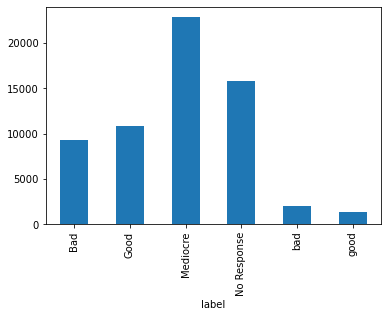

In [24]:
## Check if number of labels in each category is similar or not
print(df_cluster_label.groupby(['label']).size())
ax = df_cluster_label.groupby(['label']).size().plot(kind = 'bar')

In [25]:
# seems the lables are not propery labeled

In [26]:
# create a list of our conditions for proper labels for supervised learning and features selection

conditions = [(df_cluster_label['label'] == 'Mediocre'),
    (df_cluster_label['label'] == 'Bad'), (df_cluster_label['label'] == 'No Response'), (df_cluster_label['label']== 'Good'),
             (df_cluster_label['label']== 'bad'), (df_cluster_label['label']== 'good')]

# create a list of the values we want to assign for each condition
#values = ['2', '0', '3', '1', '0', '1']
values = ['Mediocre', 'Bad', 'No Response', 'Good', 'Bad', 'Good']
# create a new column and use np.select to assign values to it using our lists as arguments
df_cluster_label['updated_label'] = np.select(conditions, values)
df_cluster_label
# display updated DataFrame
df_cluster_label.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label,updated_label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,12,Mediocre,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,12,Mediocre,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,29,Bad,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,12,Mediocre,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,19,Mediocre,Mediocre


In [27]:
df_cluster_label.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label,updated_label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,12,Mediocre,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,12,Mediocre,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,29,Bad,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,12,Mediocre,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,19,Mediocre,Mediocre


In [28]:
# name dataframe future non_normalized supervised learning
non_narmalized_df = df_cluster_label.copy()
non_narmalized_df.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label,updated_label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,12,Mediocre,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,12,Mediocre,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,29,Bad,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,12,Mediocre,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,19,Mediocre,Mediocre


updated_label
Bad            11306
Good           12245
Mediocre       22836
No Response    15772
dtype: int64


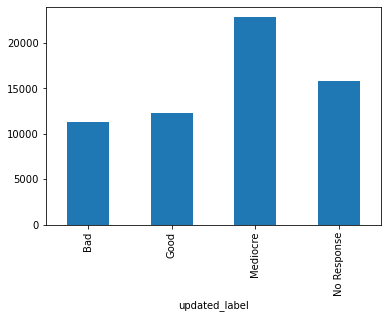

In [29]:
## Check if number of labels in each category is similar after proper labelling

print(df_cluster_label.groupby(['updated_label']).size())
ax = df_cluster_label.groupby(['updated_label']).size().plot(kind = 'bar')

In [30]:
#non-normalized data frame

non_narmalized_df = df_cluster_label.copy()
non_narmalized_df.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label,updated_label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,12,Mediocre,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,12,Mediocre,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,29,Bad,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,12,Mediocre,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,19,Mediocre,Mediocre


In [31]:
#df_lables = df_cluster_label.iloc[:,11:] # with droping drug, cell
# create new dataframe with labels only
df_lables = df_cluster_label.iloc[:,13:]
df_lables.head()

,label,updated_label
0,Mediocre,Mediocre
1,Mediocre,Mediocre
2,Bad,Bad
3,Mediocre,Mediocre
4,Mediocre,Mediocre


In [29]:
# normalized the whole data frame except few columns
from sklearn import preprocessing
x = df_cluster_label.drop(labels = ['cluster','label', 'updated_label'], axis=1, inplace=True)


In [30]:
#nomarlized thd data

x = df_cluster_label.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_cluster_label_nomarlized = pd.DataFrame(x_scaled, columns=df_cluster_label.columns )
df_cluster_label_nomarlized.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit
0,0.603214,0.022029,0.000999,0.000995,0.042521,0.187458,0.028345,1.0,3.148090e-08,9.677333e-311,0.868060,1.0
1,0.603214,0.022029,0.000999,0.000995,0.050120,0.189964,0.025263,1.0,5.796679e-08,4.877807e-311,0.869882,1.0
2,0.603214,0.022029,0.000999,0.000995,0.039485,0.204153,0.032472,1.0,5.538878e-07,9.091610e-314,0.882427,1.0
3,0.603214,0.022029,0.000999,0.000995,0.041139,0.157420,0.023907,1.0,2.559892e-08,1.067555e-310,0.869888,1.0
4,0.603214,0.022029,0.000999,0.000995,0.033413,0.203315,0.035477,1.0,2.223728e-08,2.466680e-310,0.841204,1.0


In [31]:
# Join two DataFrames after normalization

normalized_df = df_cluster_label_nomarlized.join(df_lables)
normalized_df.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,label,updated_label
0,0.603214,0.022029,0.000999,0.000995,0.042521,0.187458,0.028345,1.0,3.148090e-08,9.677333e-311,0.868060,1.0,Mediocre,Mediocre
1,0.603214,0.022029,0.000999,0.000995,0.050120,0.189964,0.025263,1.0,5.796679e-08,4.877807e-311,0.869882,1.0,Mediocre,Mediocre
2,0.603214,0.022029,0.000999,0.000995,0.039485,0.204153,0.032472,1.0,5.538878e-07,9.091610e-314,0.882427,1.0,Bad,Bad
3,0.603214,0.022029,0.000999,0.000995,0.041139,0.157420,0.023907,1.0,2.559892e-08,1.067555e-310,0.869888,1.0,Mediocre,Mediocre
4,0.603214,0.022029,0.000999,0.000995,0.033413,0.203315,0.035477,1.0,2.223728e-08,2.466680e-310,0.841204,1.0,Mediocre,Mediocre


In [32]:
# drop nan values if any

normalized_df.dropna(subset=['min_conc', 'max_conc', 'min_norm_intensity', 'max_norm_intensity', 'mean_sd', 'upper_limit', 'IC50', 'lower_limit',  'label'], inplace=True)
normalized_df

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,label,updated_label
0,0.603214,0.022029,0.000999,0.000995,0.042521,0.187458,0.028345,1.0,3.148090e-08,9.677333e-311,0.868060,1.0,Mediocre,Mediocre
1,0.603214,0.022029,0.000999,0.000995,0.050120,0.189964,0.025263,1.0,5.796679e-08,4.877807e-311,0.869882,1.0,Mediocre,Mediocre
2,0.603214,0.022029,0.000999,0.000995,0.039485,0.204153,0.032472,1.0,5.538878e-07,9.091610e-314,0.882427,1.0,Bad,Bad
3,0.603214,0.022029,0.000999,0.000995,0.041139,0.157420,0.023907,1.0,2.559892e-08,1.067555e-310,0.869888,1.0,Mediocre,Mediocre
4,0.603214,0.022029,0.000999,0.000995,0.033413,0.203315,0.035477,1.0,2.223728e-08,2.466680e-310,0.841204,1.0,Mediocre,Mediocre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62154,0.405051,0.127503,0.001249,0.004995,0.176509,0.399052,0.051606,1.0,4.133694e-08,6.043391e-308,0.872832,1.0,Mediocre,Mediocre
62155,0.405142,0.127503,0.001249,0.004995,0.385335,0.324740,0.041630,1.0,3.675583e-08,2.089565e-307,0.879166,1.0,Bad,Bad
62156,0.393848,0.127503,0.001249,0.004995,0.367746,0.300561,0.045680,1.0,3.184690e-08,9.063533e-309,0.820897,1.0,Good,Good
62157,0.395684,0.127503,0.001249,0.004995,0.328620,0.334116,0.079713,1.0,3.247656e-08,1.688543e-305,0.878249,1.0,Good,Good


In [33]:
# drop label column as we don't need it

normalized_df = normalized_df.drop(['label'], axis=1)
normalized_df.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,updated_label
0,0.603214,0.022029,0.000999,0.000995,0.042521,0.187458,0.028345,1.0,3.148090e-08,9.677333e-311,0.868060,1.0,Mediocre
1,0.603214,0.022029,0.000999,0.000995,0.050120,0.189964,0.025263,1.0,5.796679e-08,4.877807e-311,0.869882,1.0,Mediocre
2,0.603214,0.022029,0.000999,0.000995,0.039485,0.204153,0.032472,1.0,5.538878e-07,9.091610e-314,0.882427,1.0,Bad
3,0.603214,0.022029,0.000999,0.000995,0.041139,0.157420,0.023907,1.0,2.559892e-08,1.067555e-310,0.869888,1.0,Mediocre
4,0.603214,0.022029,0.000999,0.000995,0.033413,0.203315,0.035477,1.0,2.223728e-08,2.466680e-310,0.841204,1.0,Mediocre


In [34]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    normalized_df.drop(['updated_label'], axis=1),
    normalized_df['updated_label'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((42757, 12), (18325, 12))

In [35]:
#perform feature selections

sel = SelectByTargetMeanPerformance(
    variables=None,
    scoring="roc_auc",
    threshold=None,
    bins=3,
    strategy="equal_frequency",
    cv=3,
    regression=False,
)

sel.fit(X_train, y_train)

SelectByTargetMeanPerformance(bins=3, strategy='equal_frequency')

In [36]:
# check features
sel.feature_performance_

{'cell': nan,
 'drug': nan,
 'min_conc': nan,
 'max_conc': nan,
 'min_norm_intensity': nan,
 'max_norm_intensity': nan,
 'mean_sd': nan,
 'convergence': nan,
 'upper_limit': nan,
 'IC50': nan,
 'slope': nan,
 'lower_limit': nan}

In [37]:
# initialize feature selector
sel = SelectBySingleFeaturePerformance(
        estimator=LinearRegression(), scoring="r2", cv=3, threshold=0.01)

In [38]:
# fit transformer
sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=LinearRegression(), scoring='r2',
                                 threshold=0.01)

In [39]:
sel.features_to_drop_

[]

In [40]:
sel.feature_performance_

{'cell': nan,
 'drug': nan,
 'min_conc': nan,
 'max_conc': nan,
 'min_norm_intensity': nan,
 'max_norm_intensity': nan,
 'mean_sd': nan,
 'convergence': nan,
 'upper_limit': nan,
 'IC50': nan,
 'slope': nan,
 'lower_limit': nan}

## Didn't perform feature selection on above as data contain very high values and low values as well as negative values

## Work on another method


In [41]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [42]:
#split for x and cy
array = normalized_df.values
X = array[:,0:12]
#X
Y = array[:,12:14]
#Y


In [43]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[3.615e+01 1.049e+01 7.436e-01 1.883e+00 9.774e+01 2.034e+00 6.143e+00
 6.665e-01 4.959e+00 2.935e+00 1.133e-02 3.108e-05]
[[0.6032139577594122 0.022029372496662147 0.04252148064336707
  0.0283454402060125]
 [0.6032139577594122 0.022029372496662147 0.0501197115770229
  0.025262706823197922]
 [0.6032139577594122 0.022029372496662147 0.039485367446027556
  0.03247186857090041]
 [0.6032139577594122 0.022029372496662147 0.04113853902991921
  0.023906670584445747]
 [0.6032139577594122 0.022029372496662147 0.03341314105134858
  0.0354773525764302]]


In [44]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [45]:
# Feature extraction
# rank the column name for features selction as well as true and false which fetures to use

model = LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 6
Selected Features: [False False  True False  True  True  True False  True False  True False]
Feature Ranking: [2 5 1 4 1 1 1 7 1 3 1 6]


In [33]:
#features for machine learning


In [51]:

features_df = normalized_df.copy()
features_df.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,updated_label
0,0.603214,0.022029,0.000999,0.000995,0.042521,0.187458,0.028345,1.0,3.148090e-08,9.677333e-311,0.868060,1.0,Mediocre
1,0.603214,0.022029,0.000999,0.000995,0.050120,0.189964,0.025263,1.0,5.796679e-08,4.877807e-311,0.869882,1.0,Mediocre
2,0.603214,0.022029,0.000999,0.000995,0.039485,0.204153,0.032472,1.0,5.538878e-07,9.091610e-314,0.882427,1.0,Bad
3,0.603214,0.022029,0.000999,0.000995,0.041139,0.157420,0.023907,1.0,2.559892e-08,1.067555e-310,0.869888,1.0,Mediocre
4,0.603214,0.022029,0.000999,0.000995,0.033413,0.203315,0.035477,1.0,2.223728e-08,2.466680e-310,0.841204,1.0,Mediocre


In [52]:
#Selected Features: [False False  True False  True  True  True False  True False  True False]
#Feature Ranking: [2 5 1 4 1 1 1 7 1 3 1 6]
features_df = normalized_df[["min_conc", "min_norm_intensity","max_norm_intensity", "mean_sd", "upper_limit", "slope", "updated_label"]]
features_df.head()

,min_conc,min_norm_intensity,max_norm_intensity,mean_sd,upper_limit,slope,updated_label
0,0.000999,0.042521,0.187458,0.028345,3.148090e-08,0.868060,Mediocre
1,0.000999,0.050120,0.189964,0.025263,5.796679e-08,0.869882,Mediocre
2,0.000999,0.039485,0.204153,0.032472,5.538878e-07,0.882427,Bad
3,0.000999,0.041139,0.157420,0.023907,2.559892e-08,0.869888,Mediocre
4,0.000999,0.033413,0.203315,0.035477,2.223728e-08,0.841204,Mediocre


updated_label
Bad            11156
Good           11966
Mediocre       22436
No Response    15524
dtype: int64


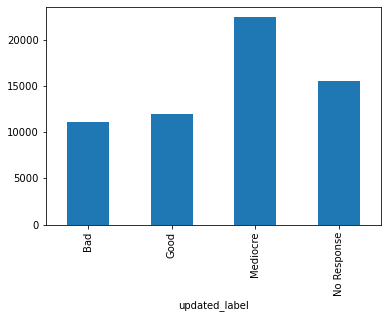

In [53]:
## Check if number of labels in each category is similar
print(features_df.groupby(['updated_label']).size())
ax = features_df.groupby(['updated_label']).size().plot(kind = 'bar')

In [54]:
# split the dataframe for machine learning
#from sklearn.model_selection import train_test_split
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(features_df[features_df.columns[:-1]], 
                                                    features_df['updated_label'],
                                                    stratify=features_df['updated_label'], test_size = test_size)
# Now let's see what we're working with
print(f"Test set is {len(X_test)} items and train set is {len(X_train)} items large.")

Test set is 18325 items and train set is 42757 items large.


## Some codes on below cells are utilized from MADS course Sports Analytics SIADS687

In [55]:
# setup to build our model.

# basic descision tree classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1000).fit(X_train, y_train)

clf.score(X_train,y_train)

1.0

## Model check with selected features and normalized data

0.5065081491819436

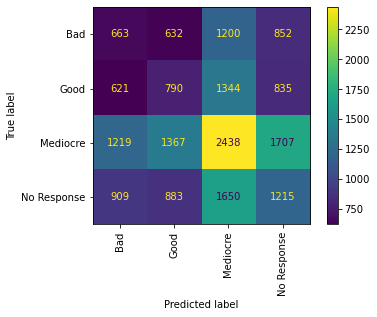

In [56]:


# interested in our test set, so let's bring in the confusion matrix functions and ROC/AUC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
#  predict on the hold out test set
predictions = clf.predict(X_test)
# render that for analysis as a confusion matrix
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
# adjust the label rotation because our class names are large
plt.xticks(rotation = 90)
#generate our AUC curve data
roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

## Model check with all features and normalized data

In [57]:

all_features_df = normalized_df[["cell", "drug", "min_conc", "max_conc",  "min_norm_intensity", "max_norm_intensity", "mean_sd","convergence", "upper_limit","IC50","slope", "lower_limit", "updated_label"]]
all_features_df.head()


,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,updated_label
0,0.603214,0.022029,0.000999,0.000995,0.042521,0.187458,0.028345,1.0,3.148090e-08,9.677333e-311,0.868060,1.0,Mediocre
1,0.603214,0.022029,0.000999,0.000995,0.050120,0.189964,0.025263,1.0,5.796679e-08,4.877807e-311,0.869882,1.0,Mediocre
2,0.603214,0.022029,0.000999,0.000995,0.039485,0.204153,0.032472,1.0,5.538878e-07,9.091610e-314,0.882427,1.0,Bad
3,0.603214,0.022029,0.000999,0.000995,0.041139,0.157420,0.023907,1.0,2.559892e-08,1.067555e-310,0.869888,1.0,Mediocre
4,0.603214,0.022029,0.000999,0.000995,0.033413,0.203315,0.035477,1.0,2.223728e-08,2.466680e-310,0.841204,1.0,Mediocre


In [58]:

X_train, X_test, y_train, y_test = train_test_split(all_features_df[all_features_df.columns[:-1]], 
                                                    all_features_df['updated_label'],
                                                    stratify=all_features_df['updated_label'],test_size = test_size)
# Now let's see what we're working with
print(f"Test set is {len(X_test)} items and train set is {len(X_train)} items large.")

Test set is 18325 items and train set is 42757 items large.


In [59]:

clf = DecisionTreeClassifier(random_state=1000).fit(X_train, y_train)
#fit the training data -
clf.score(X_train,y_train)

1.0

0.5454211561936646

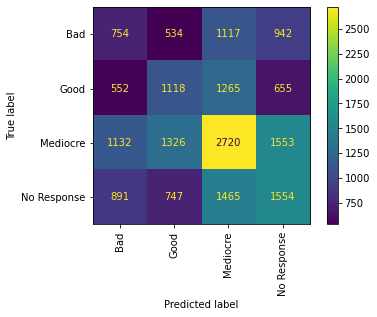

In [60]:
# on all features 

# Now let's predict on the hold out test set
predictions = clf.predict(X_test)
# And let's render that for analysis as a confusion matrix
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
# And I'll adjust the label rotation because our class names are large
plt.xticks(rotation = 90)
# And we'll generate our AUC curve data
roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

## Model check with all features and non_normalized data

In [61]:
#check the dataframe

non_narmalized_df.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label,updated_label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,12,Mediocre,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,12,Mediocre,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,29,Bad,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,12,Mediocre,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,19,Mediocre,Mediocre


In [62]:
# convert the boolean value to binary value

non_narmalized_df['convergence'] = np.where(non_narmalized_df['convergence']==True, 1, 0)
non_narmalized_df.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label,updated_label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,1,0.901533,0.010218,-2.155016,0.152275,12,Mediocre,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,1,1.610422,0.005150,-1.883030,0.167002,12,Mediocre,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,1,14.883637,0.000010,-0.010746,-12.938230,29,Bad,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,1,0.744103,0.011272,-1.882265,0.129222,12,Mediocre,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,1,0.654130,0.026046,-6.163449,0.129686,19,Mediocre,Mediocre


In [63]:
# convert IC50 to meaning values set as some of them very high variability on the data

non_narmalized_df['IC50'] = non_narmalized_df['IC50'].where(non_narmalized_df['IC50']<30, 30)
non_narmalized_df['IC50'] = non_narmalized_df['IC50'].where(non_narmalized_df['IC50']>0.0000001, 0)
non_narmalized_df.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label,updated_label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,1,0.901533,0.010218,-2.155016,0.152275,12,Mediocre,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,1,1.610422,0.005150,-1.883030,0.167002,12,Mediocre,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,1,14.883637,0.000010,-0.010746,-12.938230,29,Bad,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,1,0.744103,0.011272,-1.882265,0.129222,12,Mediocre,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,1,0.654130,0.026046,-6.163449,0.129686,19,Mediocre,Mediocre


In [64]:
#from sklearn.model_selection import train_test_split
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(non_narmalized_df[non_narmalized_df.columns[:-3]], 
                                                    non_narmalized_df['updated_label'],
                                                    stratify=non_narmalized_df['updated_label'], test_size = test_size)
# Now let's see what we're working with
print(f"Test set is {len(X_test)} items and train set is {len(X_train)} items large.")

Test set is 18648 items and train set is 43511 items large.


In [65]:
clf = DecisionTreeClassifier(random_state=1000).fit(X_train, y_train)
#  fit the training data

clf.score(X_train,y_train)

1.0

0.8608499218450464

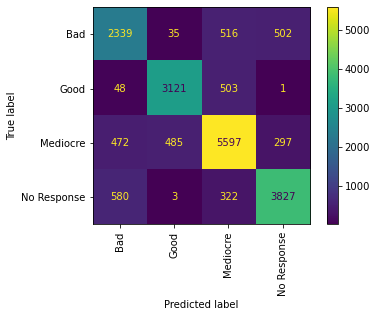

In [66]:
# with all features and non-normalized data 

# Now let's predict on the hold out test set
predictions = clf.predict(X_test)
# And let's render that for analysis as a confusion matrix
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.xticks(rotation = 90)
# And we'll generate our AUC curve data
roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

In [67]:
# Now, let's create our training and validation sets. 
test_size = 0.3
X_train, X_val, y_train, y_val = train_test_split(non_narmalized_df[non_narmalized_df.columns[:-3]],
                                                  non_narmalized_df['updated_label'],
                                                  test_size = test_size,
                                                  random_state=1000, 
                                                  stratify=non_narmalized_df['updated_label'])
#fill missing values with the mean.
# (a) choosing the mean is an arbitrary choice on my part! It might not make sense always!
# (b) you *must* do this *after* you split your training/validation sets, these two
# datasets must be treated as independent
X_train=X_train.fillna(X_train.mean())
X_val=X_val.fillna(X_val.mean())

In [68]:
#check the value counts of labels
y_val.value_counts()

Mediocre       6851
No Response    4732
Good           3673
Bad            3392
Name: updated_label, dtype: int64

In [69]:
# import our ensemble classifier
from sklearn.ensemble import VotingClassifier

#dictionary of classifiers to use
clfs={}

# create a couple of different of descision trees
from sklearn.tree import DecisionTreeClassifier

# - one which has only a depth of 3
clfs["dt0"]=DecisionTreeClassifier(max_depth=3, random_state=1000)
# - one which requires there to be at least 7 samples at each leaf
clfs["dt1"]=DecisionTreeClassifier(min_samples_leaf=7, random_state=1000)
# - and one which balances the classes since we have unbalanced data
clfs["dt2"]=DecisionTreeClassifier(class_weight="balanced", random_state=1000)

In [70]:

# voting ensembles, can do work in parallel. Here I'm setting the n_jobs
# parameter to -1, which tells the classifier to use all system CPUs
voters=VotingClassifier(estimators=clfs.items(), n_jobs=-1)

# fit the data
voters.fit(X_train,y_train)

VotingClassifier(estimators=dict_items([('dt0', DecisionTreeClassifier(max_depth=3, random_state=1000)), ('dt1', DecisionTreeClassifier(min_samples_leaf=7, random_state=1000)), ('dt2', DecisionTreeClassifier(class_weight='balanced', random_state=1000))]),
                 n_jobs=-1)

In [71]:
# voters variable is this collection of three different 
# models which have been trained on this dataset
# look at the accuracy or other evaluation measures
voters.score(X_train, y_train)

0.944404863138057

In [72]:
# performance in our validation dataset

voters.score(X_val, y_val)

0.8258794508794509

In [73]:
from sklearn.ensemble import BaggingClassifier

# descision trees. We can set how many classifiers we want the bagger
# using the n_estimators parameter. 

bagger=BaggingClassifier(base_estimator=clfs["dt0"],
                        n_estimators=10,
                        max_features=0.7,
                        n_jobs=-1,
                        random_state=1000)
bagger.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                        random_state=1000),
                  max_features=0.7, n_jobs=-1, random_state=1000)

In [74]:
# With the bagger and the voter we can actually explore the individual models 

bagger.estimators_

[DecisionTreeClassifier(max_depth=3, random_state=1970544363),
 DecisionTreeClassifier(max_depth=3, random_state=1077348022),
 DecisionTreeClassifier(max_depth=3, random_state=473922508),
 DecisionTreeClassifier(max_depth=3, random_state=2113565594),
 DecisionTreeClassifier(max_depth=3, random_state=1173624936),
 DecisionTreeClassifier(max_depth=3, random_state=1474976016),
 DecisionTreeClassifier(max_depth=3, random_state=1528487102),
 DecisionTreeClassifier(max_depth=3, random_state=1071226617),
 DecisionTreeClassifier(max_depth=3, random_state=499256588),
 DecisionTreeClassifier(max_depth=3, random_state=906594506)]

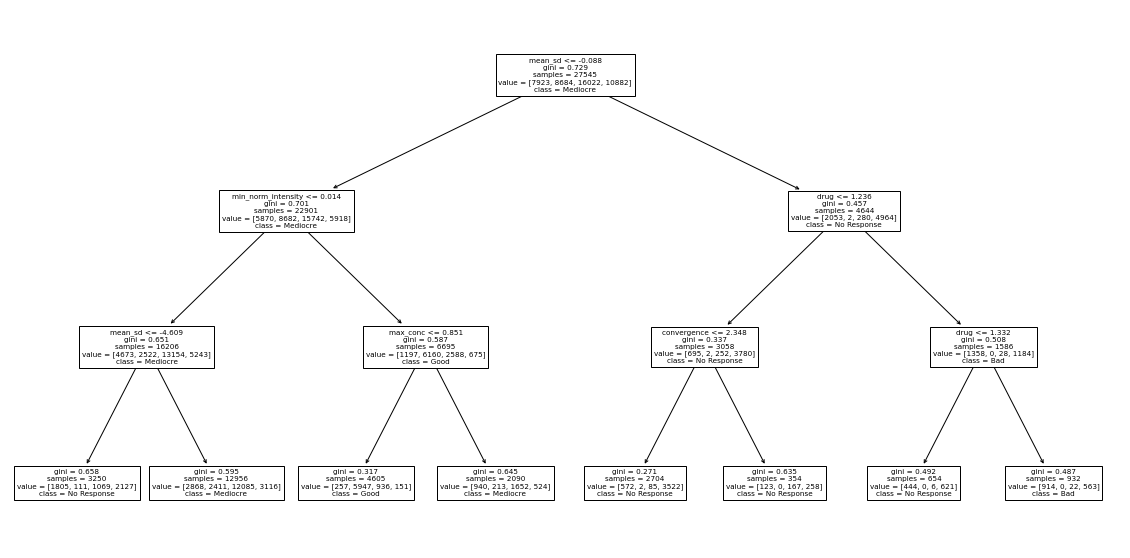

In [75]:

# all just regular descision trees underneath
# plotting them

# tree plotting functionality
from sklearn.tree import plot_tree
# Create a new figure
fig= plt.figure(figsize=(20,10))
# And now take a look at that first tree
plot_tree(bagger.estimators_[0], 
          feature_names=X_train.columns, 
          class_names=np.unique(y_train.astype(str)));

#  save the output to a file

plt.savefig('tree.svg',bbox_inches = "tight")

In [76]:
# bagger both on training data
bagger.score(X_train, y_train)

0.7307807221162465

In [77]:
# validation data
bagger.score(X_val, y_val)

0.7313921063921064

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

# select various tree parameters. 
# multiple boosters and ensemble them together
booster=GradientBoostingClassifier(min_samples_leaf=7, 
                                   max_depth=5, 
                                   n_estimators=100, 
                                   random_state=1000)

booster.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=7, random_state=1000)

In [79]:
# see how many models it
# ended up generating
booster.n_estimators

100

In [80]:
# the score on the training set
booster.score(X_train, y_train)

0.9012893291351612

In [81]:
# validation data
bagger.score(X_val, y_val)

0.7313921063921064

In [82]:

from sklearn.ensemble import StackingClassifier

# LogisticRegression
from sklearn.linear_model import LogisticRegression
stacker=StackingClassifier(estimators=clfs.items(), 
                           final_estimator=LogisticRegression(max_iter=1000,random_state=1000), 
                           cv=5, 
                           n_jobs=-1)
stacker.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=dict_items([('dt0', DecisionTreeClassifier(max_depth=3, random_state=1000)), ('dt1', DecisionTreeClassifier(min_samples_leaf=7, random_state=1000)), ('dt2', DecisionTreeClassifier(class_weight='balanced', random_state=1000))]),
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=1000),
                   n_jobs=-1)

In [83]:
# scores to consider
stacker.score(X_train, y_train)

0.9507251039966905

In [84]:
# validation scores to consider
stacker.score(X_val, y_val)

0.8379450879450879

0.9566593826592193

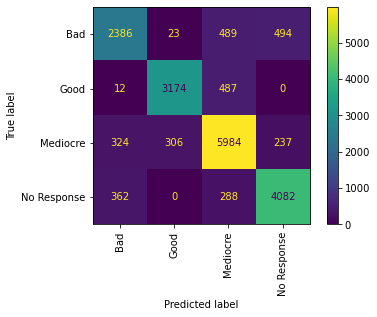

In [85]:
# predict on the hold out test set
predictions = stacker.predict(X_val)
#analysis as a confusion matrix
cm = confusion_matrix(y_val, predictions, labels=stacker.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=stacker.classes_)
disp.plot()
plt.xticks(rotation = 90)
#generate our AUC curve data
roc_auc_score(y_val, stacker.predict_proba(X_val), multi_class='ovr')

In [86]:
y_val.value_counts()

Mediocre       6851
No Response    4732
Good           3673
Bad            3392
Name: updated_label, dtype: int64

## Hyperparameter tuning on ensemble methods

## Source: https://www.kaggle.com/code/sigmaset/hyperparameter-tuning-ensemble-methods

In [87]:

import matplotlib.pyplot as plt; plt.rcdefaults()

# Feature Engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

# Classification Models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter Tuning
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold

# Performance Measures
from sklearn.metrics import accuracy_score

# Global Variables
rnd_state = 42
skfold = StratifiedKFold(n_splits=5)

In [88]:
#logistic regression
log_clf = LogisticRegression(random_state=rnd_state, solver='lbfgs')
log_clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [89]:
log_pred = log_clf.predict(X_val)

In [90]:
#get cross_val_score
log_cross_scores = cross_val_score(log_clf, X_train, y_train, cv=skfold, scoring="accuracy")
log_scores = (log_cross_scores.mean() + accuracy_score (log_pred, y_val))/2
log_scores

0.3689943517945473

In [91]:
%%time
#SGD
sgd_clf = SGDClassifier(max_iter=60, penalty = None, eta0=0.1, random_state=rnd_state, tol =1e-3)
sgd_clf.fit(X_train, y_train)

CPU times: user 634 ms, sys: 14 µs, total: 634 ms
Wall time: 633 ms


SGDClassifier(eta0=0.1, max_iter=60, penalty=None, random_state=42)

In [92]:
#get cross_val_score
sgd_cross_scores = cross_val_score(sgd_clf, X_train, y_train, cv=skfold, scoring="accuracy")
sgd_pred = sgd_clf.predict(X_val)
sgd_scores = (sgd_cross_scores.mean() + accuracy_score (sgd_pred, y_val))/2
sgd_scores

0.32571787530356827

In [93]:
%%time
#svm
svm_clf = SVC (gamma='auto')
svm_clf.fit (X_train, y_train)

CPU times: user 5min 57s, sys: 651 ms, total: 5min 57s
Wall time: 5min 57s


SVC(gamma='auto')

In [94]:
#get cross_val_score
svm_cross_scores = cross_val_score(svm_clf, X_train, y_train, cv=skfold, scoring="accuracy")
svm_pred = svm_clf.predict(X_val)
svm_scores = (svm_cross_scores.mean() + accuracy_score (svm_pred, y_val))/2
svm_scores

0.6057822426151973

In [95]:
%%time
#KNN
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train) 
#get cross_val_score_
knn_cross_scores = cross_val_score(knn_clf, X_train, y_train, cv=skfold, scoring="accuracy")
knn_pred = knn_clf.predict(X_val)
knn_scores = (knn_cross_scores.mean() + accuracy_score (knn_pred,  y_val))/2
knn_scores

CPU times: user 5 s, sys: 28 ms, total: 5.03 s
Wall time: 5.03 s


0.6035262020015819

In [96]:
%%time
#hyperparameter tuning on KNN

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

grid_knn_clf = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_knn_clf.fit(X_train, y_train)
grid_knn_clf.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 569 ms, sys: 128 ms, total: 697 ms
Wall time: 5.86 s


{'n_neighbors': 5, 'weights': 'distance'}

In [97]:
%%time
#get cross validation score after hyperparameter tuning

grid_knn_cross_scores = cross_val_score(grid_knn_clf, X_train, y_train, cv=skfold, scoring="accuracy")
grid_knn_pred = grid_knn_clf.predict(X_val)
grid_knn_scores = (grid_knn_cross_scores.mean() + accuracy_score (grid_knn_pred, y_val))/2
grid_knn_scores

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 5.47 s, sys: 184 ms, total: 5.65 s
Wall time: 24.6 s


0.6319555159263703

In [98]:
%%time
#extra tree
ext_clf = ExtraTreesClassifier()

param_grid = {"max_depth": [None],
              "max_features": [10, 17],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False, True],
              "n_estimators" :[50,100,200],
              "criterion": ["gini"]}

# Cross validate model with Kfold stratified cross val

grid_ext_clf = GridSearchCV(ext_clf,param_grid, cv=skfold, scoring="accuracy", n_jobs= 4, verbose = 1)
grid_ext_clf.fit(X_train, y_train)

grid_ext_clf.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
CPU times: user 19.6 s, sys: 964 ms, total: 20.6 s
Wall time: 5min 16s


{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [99]:
#get score after hyperparameter tuning
grid_ext_pred = grid_ext_clf.predict(X_val)

grid_ext_scores = (grid_ext_clf.best_score_ + accuracy_score (grid_ext_pred, y_val))/2
grid_ext_scores

0.857834512822392

0.9743079714370421

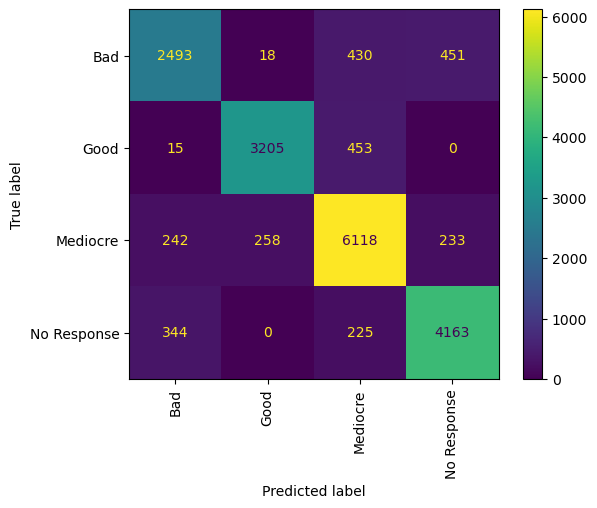

In [100]:
# Now let's predict on the hold out test set
predictions = grid_ext_clf.predict(X_val)
# analysis as a confusion matrix
cm = confusion_matrix(y_val, predictions, labels=grid_ext_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_ext_clf.classes_)
disp.plot()
plt.xticks(rotation = 90)
# generate our AUC curve data
roc_auc_score(y_val, grid_ext_clf.predict_proba(X_val), multi_class='ovr')

In [101]:
 #AdaBoost
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(random_state=rnd_state, max_depth=2),
    random_state = rnd_state)

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[10, 100, 200, 250],
              "learning_rate":  [0.05, 0.5, 1.5, 2.5]}

grid_ada_clf = GridSearchCV(ada_clf, param_grid, cv=skfold, scoring="accuracy", n_jobs= -1, verbose = 1)
grid_ada_clf.fit(X_train, y_train)
grid_ada_clf.best_params_

ada_pred = grid_ada_clf.predict(X_val)
grid_ada_scores = (grid_ada_clf.best_score_ + accuracy_score (ada_pred, y_val))/2
grid_ada_scores

Fitting 5 folds for each of 128 candidates, totalling 640 fits


0.8020752535008164

In [102]:
# create function for metrics generation

def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))

In [103]:
# display funtion for metrics

def display_classification_report(true_labels, predicted_labels, classes=['Bad', 'Good', 'Mediocre', 'No Response']):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)

In [107]:

from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 

#ada_booster_classifier metrics

ada_clf_predictions = grid_ada_clf.predict(X_val)
unique_classes = list(set(y_val))
get_metrics(true_labels=y_val, predicted_labels=ada_clf_predictions)

Accuracy: 0.8045
Precision: 0.8049
Recall: 0.8045
F1 Score: 0.803


In [108]:
#display metrics on ada_booster

display_classification_report(true_labels=y_val, 
                                  predicted_labels=ada_clf_predictions, classes=unique_classes)

              precision    recall  f1-score   support

         Bad       0.76      0.66      0.71      3392
        Good       0.86      0.78      0.82      3673
 No Response       0.81      0.88      0.84      4732
    Mediocre       0.79      0.84      0.81      6851

    accuracy                           0.80     18648
   macro avg       0.81      0.79      0.80     18648
weighted avg       0.80      0.80      0.80     18648



In [114]:
# let's predict on on some training test data set 
train_idx, test_idx = train_test_split(np.array(range(len(non_narmalized_df['updated_label']))), test_size=0.30, random_state=42)
test_idx

array([25309, 43648, 48256, ..., 56416,  3893, 52039])

In [118]:
# with ada_booster mode
# generate data frame with prediction on predicted label with predicted confidence on original updated_label
predict_probas = grid_ada_clf.predict(X_val)
test_df = non_narmalized_df.iloc[test_idx]
test_df['Predicted Label'] = ada_clf_predictions
test_df['Predicted Confidence'] = predict_probas
test_df



,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label,updated_label,Predicted Label,Predicted Confidence
26014,5230,1372,0.001001,1.0,0.330783,0.762018,0.035250,1,3.492985,0.000009,-0.459039,0.350573,37,Mediocre,Mediocre,Bad,Bad
44531,3490,1377,0.039062,10.0,0.288951,0.405630,0.045485,1,0.625523,0.042126,-0.040830,0.112207,8,Mediocre,Mediocre,Good,Good
49209,3206,1017,0.019531,5.0,0.308476,1.465098,0.388898,1,0.939422,30.000000,-0.731777,-2.148837,21,Bad,Bad,Mediocre,Mediocre
1576,8570,1089,0.010005,10.0,1.024450,1.750020,0.161699,1,3.603242,14.490283,7.624053,1.307558,27,Bad,Bad,Bad,Bad
32298,6666,1034,0.007812,2.0,0.071610,1.002615,0.029620,0,1.527400,2.744948,-0.241464,-1.400324,33,Mediocre,Mediocre,Mediocre,Mediocre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55059,6413,1862,0.015625,4.0,0.079817,0.890487,0.044312,1,0.845330,0.158074,-2.299957,0.136328,25,Good,Good,Bad,Bad
32351,3421,1034,0.007812,2.0,0.099036,1.086286,0.050883,1,1.014895,0.453467,-1.137352,-0.038596,14,Mediocre,Mediocre,Bad,Bad
57440,6290,1034,0.007812,2.0,0.041965,0.801690,0.038221,1,0.761223,0.136889,-1.769766,0.045396,25,Good,Good,Mediocre,Mediocre
3952,8692,1372,0.001001,1.0,0.465010,0.957800,0.109323,1,4.490857,0.000011,-0.546792,0.599208,28,No Response,No Response,Mediocre,Mediocre


In [122]:
#get predicted confidene labels counts
test_df['Predicted Confidence'].value_counts()


Mediocre       7275
No Response    5122
Good           3300
Bad            2951
Name: Predicted Confidence, dtype: int64

In [123]:
# get original labels counts
test_df['updated_label'].value_counts()


Mediocre       6920
No Response    4745
Good           3639
Bad            3344
Name: updated_label, dtype: int64

## END